In [4]:
import sqlite3
import pandas as pd


# Connect to the SQLite database file
conn = sqlite3.connect("C:\\Users\\CREYSAC\\Downloads\\Database.db")
# Replace ‘Database.db' with the path to your .db file if the file is in another directory.

# Create a cursor object
cursor = conn.cursor()

# Query to retrieve table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all table names
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])
    
df = pd.read_sql_query('Select * from Heart_disease' , conn)

# Close the connection
conn.close()


Electric_cars
Fraud_detection
Heart_disease
Insurance_Prediction
New_Delhi_Reviews


In [6]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.6,Yes,No,No,3.0,30.0,No,,55-59,White,Yes,Yes,,5.0,Yes,No,
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [10]:
import pandas as pd
import logging

class DataIngestion:
    def __init__(self, file_path):
        self.file_path = file_path

    def initiate_data_ingestion(self):
        """Reads and processes the dataset: drops duplicates, replaces empty strings, and converts column types."""
        try:
            # Read the dataset
            df = pd.read_csv(self.file_path)
            logging.info(f"Read the dataset as dataframe with shape: {df.shape}")
            print(f"Data Shape: {df.shape}")

            # Drop duplicate rows
            original_shape = df.shape
            df.drop_duplicates(inplace=True)
            logging.info(f"Dropped duplicates. Original shape: {original_shape}, New shape: {df.shape}")
            print(f"Dropped duplicates. New shape: {df.shape}")

            # Replace empty strings with pd.NA
            df.replace("", pd.NA, inplace=True)
            na_counts = df.isna().sum()
            logging.info(f"Missing values after replacing empty strings: \n{na_counts}")
            print(f"Missing values after replacing empty strings: \n{na_counts}")

            # Convert categorical columns
            categorical_columns = [
                'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
                'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
                'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease',
                'SkinCancer'
            ]
            for col in categorical_columns:
                if col in df.columns:
                    df[col] = df[col].astype('category')
            logging.info("Converted categorical columns to 'category' dtype.")
            print("Categorical columns converted.")

            # Convert numeric columns
            numeric_columns = [
                'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'
            ]
            for col in numeric_columns:
                if col in df.columns:
                    df[col] = pd.to_numeric(df[col], errors='coerce')
            logging.info("Converted numeric columns to numeric dtype.")
            print(df.dtypes)
            
            return df
        except Exception as e:
            logging.error(f"Error during data ingestion: {e}")
            raise e


# Initialize logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')




In [16]:
# Main code to run the ingestion and processing
if __name__ == "__main__":
    try:
        print("Starting data ingestion...")
        
        # Specify the file path for the data
        file_path = 'heart_disease_data.csv'
        
        # Initialize the DataIngestion class
        ingestion = DataIngestion(file_path)
        
        # Initiate the data ingestion and processing
        processed_df = ingestion.initiate_data_ingestion()
        
        # Display the first few rows of the processed dataframe
        print("\nProcessed DataFrame (first 5 rows):")
        print(processed_df.head())
        
    except Exception as e:
        print(f"Error: {e}")

Starting data ingestion...


2024-09-22 12:16:00,481 - INFO - Read the dataset as dataframe with shape: (319795, 18)


Data Shape: (319795, 18)


2024-09-22 12:16:00,849 - INFO - Dropped duplicates. Original shape: (319795, 18), New shape: (300890, 18)


Dropped duplicates. New shape: (300890, 18)


2024-09-22 12:16:01,167 - INFO - Missing values after replacing empty strings: 
HeartDisease            0
BMI                 10613
Smoking             10137
AlcoholDrinking         0
Stroke                  0
PhysicalHealth      10613
MentalHealth            0
DiffWalking         10137
Sex                 15639
AgeCategory             0
Race                    0
Diabetic            10613
PhysicalActivity        0
GenHealth           15639
SleepTime               0
Asthma              10137
KidneyDisease           0
SkinCancer          15639
dtype: int64


Missing values after replacing empty strings: 
HeartDisease            0
BMI                 10613
Smoking             10137
AlcoholDrinking         0
Stroke                  0
PhysicalHealth      10613
MentalHealth            0
DiffWalking         10137
Sex                 15639
AgeCategory             0
Race                    0
Diabetic            10613
PhysicalActivity        0
GenHealth           15639
SleepTime               0
Asthma              10137
KidneyDisease           0
SkinCancer          15639
dtype: int64


2024-09-22 12:16:01,449 - INFO - Converted categorical columns to 'category' dtype.
2024-09-22 12:16:01,456 - INFO - Converted numeric columns to numeric dtype.


Categorical columns converted.
HeartDisease        category
BMI                  float64
Smoking             category
AlcoholDrinking     category
Stroke              category
PhysicalHealth       float64
MentalHealth         float64
DiffWalking         category
Sex                 category
AgeCategory         category
Race                category
Diabetic            category
PhysicalActivity    category
GenHealth           category
SleepTime            float64
Asthma              category
KidneyDisease       category
SkinCancer          category
dtype: object

Processed DataFrame (first 5 rows):
  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No       

In [12]:
import sys
import numpy as np
import pandas as pd
import os
import pickle
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import logging

# Initialize logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define the save_object function
def save_object(file_path, obj):
    try:
        dir_path = os.path.dirname(file_path)
        os.makedirs(dir_path, exist_ok=True)
        with open(file_path, "wb") as file_obj:
            pickle.dump(obj, file_obj)
    except Exception as e:
        logging.error(f"Error saving object: {e}")
        raise e


# DataTransformation class definition
class DataTransformation:
    def __init__(self):
        self.preprocessor_obj_file_path = os.path.join('artifacts', "preprocessor.pkl")

    def initiate_data_transformation(self, df):
        try:
            logging.info(f"Initial dataframe shape: {df.shape}")
    
            columns_to_keep = ['BMI', 'AgeCategory', 'SleepTime', 'PhysicalHealth', 'MentalHealth',
                               'GenHealth', 'Diabetic', 'Sex', 'Smoking', 'Stroke', 'PhysicalActivity', 
                               'DiffWalking', 'HeartDisease']
            df = df[columns_to_keep]
            logging.info(f"Dataframe shape after dropping columns: {df.shape}")
    
            df = self.impute_missing_values(df)
            logging.info(f"Missing value imputation completed.\nMissing values after imputation:\n{df.isnull().sum()}")
            
            logging.info(f"Data types before binary encoding:\n{df.dtypes}")
            df_encoded = self.binary_encode_columns(df)
            logging.info(f"Data types after binary encoding:\n{df_encoded.dtypes}")

            df_encoded = self.ordinal_encode_columns(df_encoded)
            logging.info(f"Data types after ordinal encoding:\n{df_encoded.dtypes}")
    
            # Convert all columns to numeric types before scaling
            df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')
    
            # Apply preprocessing and scale features
            preprocessing_obj = self.get_data_transformer_object()
            df_encoded_transformed = pd.DataFrame(preprocessing_obj.fit_transform(df_encoded), 
                                                  columns=df_encoded.columns)
    
            logging.info(f"Dataframe shape after transformation: {df_encoded_transformed.shape}")
    
            # Save the preprocessor object
            save_object(self.preprocessor_obj_file_path, preprocessing_obj)
            logging.info(f"Preprocessor object saved at {self.preprocessor_obj_file_path}")
    
            return df_encoded_transformed
    
        except Exception as e:
            logging.error(f"Error during data transformation: {e}")
            raise e


    def impute_missing_values(self, df):
        try:
            # Define columns
            numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
            categorical_features = df.select_dtypes(include=[object, 'category']).columns
            
            # Impute numeric features
            numeric_imputer = SimpleImputer(strategy='median')
            df.loc[:, numeric_features] = numeric_imputer.fit_transform(df[numeric_features])
            
            # Impute categorical features
            categorical_imputer = SimpleImputer(strategy='most_frequent')
            df.loc[:, categorical_features] = categorical_imputer.fit_transform(df[categorical_features])
            
            return df
        
        except Exception as e:
            logging.error(f"Error during missing value imputation: {e}")
            raise e

    def binary_encode_columns(self, df):
        try:
            binary_columns = ['Smoking', 'Stroke', 'PhysicalActivity', 'DiffWalking', 'HeartDisease']
            df.loc[:, binary_columns] = df[binary_columns].apply(lambda col: col.map({'Yes': 1, 'No': 0}).astype(float))
            return df
        except Exception as e:
            logging.error(f"Error during binary encoding: {e}")
            raise e

    def ordinal_encode_columns(self, df):
        try:
            # Define ordinal mappings for specific columns
            age_mapping = {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4,
                           '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9,
                           '70-74': 10, '75-79': 11, '80 or older': 12}
            diabetic_mapping = {'No': 0, 'No, borderline diabetes': 1, 'Yes (during pregnancy)': 2, 'Yes': 3}
            genhealth_mapping = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}
            sex_mapping = {'Female': 0, 'Male': 1}
            # Apply mappings
            df.loc[:, 'AgeCategory'] = df['AgeCategory'].map(age_mapping).astype(float)
            df.loc[:, 'Diabetic'] = df['Diabetic'].map(diabetic_mapping).astype(float)
            df.loc[:, 'GenHealth'] = df['GenHealth'].map(genhealth_mapping).astype(float)
            df.loc[:, 'Sex'] = df['Sex'].map(sex_mapping).astype(float)
            return df
        except Exception as e:
            logging.error(f"Error during ordinal encoding: {e}")
            raise e

    def get_data_transformer_object(self):
        try:
            column_transformer = ColumnTransformer(
                transformers=[('scaler', StandardScaler(), 
                               ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 
                                'Diabetic', 'GenHealth', 'SleepTime'])],
                remainder='passthrough'  # Keep other columns unchanged
            )
            return column_transformer
        except Exception as e:
            logging.error(f"Error creating transformer object: {e}")
            raise e



In [18]:
# Running the pipeline
if __name__ == "__main__":
    try:
        # Data Ingestion
        logging.info("Starting data ingestion...")
        df = ingestion.initiate_data_ingestion()
        logging.info("Data ingestion completed.")

        # Data Transformation
        logging.info("Starting data transformation...")
        data_transformation = DataTransformation()
        transformed_data = data_transformation.initiate_data_transformation(df)
        logging.info("Data transformation completed.")
        print(transformed_data.head())

    except Exception as e:
        logging.error(f"Error in the pipeline: {e}")

2024-09-22 12:16:10,689 - INFO - Starting data ingestion...
2024-09-22 12:16:11,173 - INFO - Read the dataset as dataframe with shape: (319795, 18)


Data Shape: (319795, 18)


2024-09-22 12:16:11,527 - INFO - Dropped duplicates. Original shape: (319795, 18), New shape: (300890, 18)


Dropped duplicates. New shape: (300890, 18)


2024-09-22 12:16:11,822 - INFO - Missing values after replacing empty strings: 
HeartDisease            0
BMI                 10613
Smoking             10137
AlcoholDrinking         0
Stroke                  0
PhysicalHealth      10613
MentalHealth            0
DiffWalking         10137
Sex                 15639
AgeCategory             0
Race                    0
Diabetic            10613
PhysicalActivity        0
GenHealth           15639
SleepTime               0
Asthma              10137
KidneyDisease           0
SkinCancer          15639
dtype: int64


Missing values after replacing empty strings: 
HeartDisease            0
BMI                 10613
Smoking             10137
AlcoholDrinking         0
Stroke                  0
PhysicalHealth      10613
MentalHealth            0
DiffWalking         10137
Sex                 15639
AgeCategory             0
Race                    0
Diabetic            10613
PhysicalActivity        0
GenHealth           15639
SleepTime               0
Asthma              10137
KidneyDisease           0
SkinCancer          15639
dtype: int64


2024-09-22 12:16:12,085 - INFO - Converted categorical columns to 'category' dtype.
2024-09-22 12:16:12,090 - INFO - Converted numeric columns to numeric dtype.
2024-09-22 12:16:12,093 - INFO - Data ingestion completed.
2024-09-22 12:16:12,093 - INFO - Starting data transformation...
2024-09-22 12:16:12,095 - INFO - Initial dataframe shape: (300890, 18)
2024-09-22 12:16:12,116 - INFO - Dataframe shape after dropping columns: (300890, 13)


Categorical columns converted.
HeartDisease        category
BMI                  float64
Smoking             category
AlcoholDrinking     category
Stroke              category
PhysicalHealth       float64
MentalHealth         float64
DiffWalking         category
Sex                 category
AgeCategory         category
Race                category
Diabetic            category
PhysicalActivity    category
GenHealth           category
SleepTime            float64
Asthma              category
KidneyDisease       category
SkinCancer          category
dtype: object


2024-09-22 12:16:13,169 - INFO - Missing value imputation completed.
Missing values after imputation:
BMI                 0
AgeCategory         0
SleepTime           0
PhysicalHealth      0
MentalHealth        0
GenHealth           0
Diabetic            0
Sex                 0
Smoking             0
Stroke              0
PhysicalActivity    0
DiffWalking         0
HeartDisease        0
dtype: int64
2024-09-22 12:16:13,171 - INFO - Data types before binary encoding:
BMI                  float64
AgeCategory         category
SleepTime            float64
PhysicalHealth       float64
MentalHealth         float64
GenHealth           category
Diabetic            category
Sex                 category
Smoking             category
Stroke              category
PhysicalActivity    category
DiffWalking         category
HeartDisease        category
dtype: object
C:\Users\CREYSAC\AppData\Local\Temp\ipykernel_23300\1379207336.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and

        BMI  AgeCategory  SleepTime  PhysicalHealth  MentalHealth  GenHealth  \
0 -1.859623    -0.052279   3.180284        0.137281      2.534518   0.412879   
1 -1.269635    -0.427602  -0.507428        1.532351     -0.417194   0.412879   
2 -0.285269     2.074551   3.180284        0.695309      2.534518  -1.536150   
3 -0.659139    -0.427602  -0.507428        1.253337     -0.417194  -0.561636   
4 -0.738014     3.075412  -0.507428       -0.699762     -0.417194   0.412879   

   Diabetic  Sex  Smoking  Stroke  PhysicalActivity  DiffWalking  HeartDisease  
0 -1.420080  0.0      1.0     0.0               1.0          0.0           0.0  
1 -0.057766  0.0      0.0     1.0               1.0          0.0           0.0  
2  0.623391  1.0      1.0     0.0               1.0          0.0           0.0  
3 -0.738923  0.0      0.0     0.0               0.0          0.0           0.0  
4  0.623391  0.0      0.0     0.0               1.0          1.0           0.0  


In [53]:
DataTransformation().initiate_data_transformation(processed_df)

2024-09-20 11:43:15,025 - INFO - Initial dataframe shape: (300890, 18)
2024-09-20 11:43:15,033 - INFO - Dataframe shape after dropping columns: (300890, 13)
2024-09-20 11:43:15,984 - INFO - Missing value imputation completed.
Missing values after imputation:
BMI                 0
AgeCategory         0
SleepTime           0
PhysicalHealth      0
MentalHealth        0
GenHealth           0
Diabetic            0
Sex                 0
Smoking             0
Stroke              0
PhysicalActivity    0
DiffWalking         0
HeartDisease        0
dtype: int64
C:\Users\CREYSAC\AppData\Local\Temp\ipykernel_23844\1483297276.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1. 0. 1. ... 0. 0. 0.]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:, binary_columns] = df[binary_columns].apply(lambda col: col.map({'Yes': 1, 'No': 0}).astype(float))
C:\Users\CREYSAC\AppData\Loc

,BMI,AgeCategory,SleepTime,PhysicalHealth,MentalHealth,GenHealth,Diabetic,Sex,Smoking,Stroke,PhysicalActivity,DiffWalking,HeartDisease
0,-1.859623,-0.052279,3.180284,0.137281,2.534518,0.412879,-1.42008,NaN,1.0,0.0,1.0,0.0,0.0
1,-1.269635,-0.427602,-0.507428,1.532351,-0.417194,0.412879,-0.057766,NaN,0.0,1.0,1.0,0.0,0.0
2,-0.285269,2.074551,3.180284,0.695309,2.534518,-1.53615,0.623391,NaN,1.0,0.0,1.0,0.0,0.0
3,-0.659139,-0.427602,-0.507428,1.253337,-0.417194,-0.561636,-0.738923,NaN,0.0,0.0,0.0,0.0,0.0
4,-0.738014,3.075412,-0.507428,-0.699762,-0.417194,0.412879,0.623391,NaN,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300885,-0.154336,0.448151,-0.507428,0.416295,2.534518,-1.53615,-0.738923,NaN,1.0,0.0,0.0,1.0,1.0
300886,0.228999,-0.427602,-0.507428,-0.978776,-0.417194,0.412879,-1.42008,NaN,1.0,0.0,1.0,0.0,0.0
300887,-0.654406,-0.427602,-0.507428,-0.420748,-0.417194,-0.561636,-0.738923,NaN,0.0,0.0,1.0,0.0,0.0
300888,0.697519,-0.427602,-0.507428,-1.536804,-0.417194,-0.561636,3.348019,NaN,0.0,0.0,0.0,0.0,0.0


In [94]:
processed_df.dtypes

HeartDisease        category
BMI                  float64
Smoking             category
AlcoholDrinking     category
Stroke              category
PhysicalHealth       float64
MentalHealth         float64
DiffWalking         category
Sex                 category
AgeCategory         category
Race                category
Diabetic            category
PhysicalActivity    category
GenHealth           category
SleepTime            float64
Asthma              category
KidneyDisease       category
SkinCancer          category
dtype: object

In [69]:
processed_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,NaN,55-59,White,Yes,Yes,NaN,5.0,Yes,No,NaN
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [88]:
import os
import sys
import xgboost as xgb
import numpy as np
from sklearn.metrics import classification_report, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import SMOTE


class ModelTrainer:
    def initiate_model_trainer(self, df):
        try:
            logging.info("Starting model training process...")

            # Check for NaN or empty string values
            nan_counts = df.isna().sum()
            empty_counts = (df == '').sum()
            
            if nan_counts.any() or empty_counts.any():
                logging.info("Data contains NaN or empty string values:")
                if nan_counts.any():
                    logging.info(f"NaN values:\n{nan_counts[nan_counts > 0]}")
                if empty_counts.any():
                    logging.info(f"Empty string values:\n{empty_counts[empty_counts > 0]}")

            # Split the DataFrame into features and target
            X = df.drop(columns='HeartDisease')
            y = df['HeartDisease']

            logging.info(f"Features shape: {X.shape}, Target shape: {y.shape}")
            logging.info(f"Features dtypes: {X.dtypes}, Target shape: {y.dtypes}")

            # Apply SMOTE to the entire dataset
            logging.info("Applying SMOTE to handle class imbalance")
            smote = SMOTE(random_state=42)
            X_resampled, y_resampled = smote.fit_resample(X, y)
            logging.info(f"SMOTE resampling completed. Resampled data shape: {X_resampled.shape}")

            # Initialize the XGBoost model with best parameters
            best_params = {
                'learning_rate': 0.1,
                'max_depth': 7,
                'n_estimators': 300,
                'subsample': 0.8
            }
            xgb_model = xgb.XGBClassifier(random_state=42, **best_params)

            # Use cross_val_predict to get predictions across all cross-validation folds
            y_pred = cross_val_predict(xgb_model, X_resampled, y_resampled, cv=5, method='predict')

            # Classification report
            logging.info("Classification Report:")
            report = classification_report(y_resampled, y_pred)
            logging.info(report)

            # Confusion Matrix
            logging.info("Confusion Matrix:")
            cm = confusion_matrix(y_resampled, y_pred)
            logging.info(cm)

            # Calculate recall for the positive class (class 1)
            recall = recall_score(y_resampled, y_pred, pos_label=1)
            logging.info(f"Recall for class 1: {recall:.4f}")

            # Log the evaluation metrics
            logging.info("Evaluation Metrics:")
            logging.info(f"Recall: {recall:.4f}")
            logging.info(f"Confusion Matrix:\n{cm}")

            return recall

        except Exception as e:
            logging.error(f"An error occurred during model training: {str(e)}")
            raise CustomException(e, sys)


In [110]:
# Import necessary modules
import logging

# Assuming the required classes and functions are already defined or imported

# Initialize logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Running the pipeline
try:
    # Data Ingestion
    logging.info("Starting data ingestion...")
    df = initiate_data_ingestion()
    logging.info("Data ingestion completed.")

    # Data Transformation
    logging.info("Starting data transformation...")
    data_transformation = DataTransformation()
    transformed_data = data_transformation.initiate_data_transformation(df)
    logging.info("Data transformation completed.")
    

    # Model Training
    logging.info("Starting model training...")
    model_trainer = ModelTrainer()
    recall = model_trainer.initiate_model_trainer(transformed_data)
    logging.info(f"Recall for the positive class: {recall:.4f}")

except Exception as e:
    logging.error(f"Error in the pipeline: {e}")


2024-09-20 20:24:06,317 - INFO - Starting data ingestion...
2024-09-20 20:24:07,042 - INFO - Initial data shape: (319795, 18)
2024-09-20 20:24:07,511 - INFO - Data shape after dropping duplicates: (300890, 18)
2024-09-20 20:24:07,680 - INFO - Replaced empty strings with pd.NA
2024-09-20 20:24:07,691 - INFO - Data ingestion completed.
2024-09-20 20:24:07,692 - INFO - Starting data transformation...
2024-09-20 20:24:07,710 - INFO - Initial dataframe shape: (300890, 18)
2024-09-20 20:24:07,735 - INFO - Dataframe shape after dropping columns: (300890, 13)
2024-09-20 20:24:08,333 - INFO - Missing value imputation completed.
Missing values after imputation:
BMI                 0
AgeCategory         0
SleepTime           0
PhysicalHealth      0
MentalHealth        0
GenHealth           0
Diabetic            0
Sex                 0
Smoking             0
Stroke              0
PhysicalActivity    0
DiffWalking         0
HeartDisease        0
dtype: int64
2024-09-20 20:24:08,333 - INFO - Data typ

In [100]:
transformed_data.dtypes

BMI                 float64
AgeCategory         float64
SleepTime           float64
PhysicalHealth      float64
MentalHealth        float64
GenHealth           float64
Diabetic            float64
Sex                 float64
Smoking             float64
Stroke              float64
PhysicalActivity    float64
DiffWalking         float64
HeartDisease        float64
dtype: object

In [114]:
df.Diabetic.value_counts()

Diabetic
No                         242619
Yes                         38740
No, borderline diabetes      6473
Yes (during pregnancy)       2445
Name: count, dtype: int64

In [126]:
for col in df.columns:
    if df[col].nunique() < 15:
        print({col : df[col].unique()})

{'HeartDisease': array(['No', 'Yes'], dtype=object)}
{'Smoking': array(['Yes', 'No', nan], dtype=object)}
{'AlcoholDrinking': array(['No', 'Yes'], dtype=object)}
{'Stroke': array(['No', 'Yes'], dtype=object)}
{'DiffWalking': array(['No', 'Yes', nan], dtype=object)}
{'Sex': array([nan, 'Female', 'Male'], dtype=object)}
{'AgeCategory': array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)}
{'Race': array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)}
{'Diabetic': array(['Yes', 'No', 'No, borderline diabetes', nan,
       'Yes (during pregnancy)'], dtype=object)}
{'PhysicalActivity': array(['Yes', 'No'], dtype=object)}
{'GenHealth': array([nan, 'Very good', 'Fair', 'Good', 'Poor', 'Excellent'],
      dtype=object)}
{'Asthma': array(['Yes', 'No', nan], dtype=object)}
{'KidneyDisease': array(['No', 'Yes'], dtype=object)}
{'SkinCan

In [30]:
transformed_data.head()

,BMI,AgeCategory,SleepTime,PhysicalHealth,MentalHealth,GenHealth,Diabetic,Sex,Smoking,Stroke,PhysicalActivity,DiffWalking,HeartDisease
0,-1.859623,-0.052279,3.180284,0.137281,2.534518,0.412879,-1.420080,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.269635,-0.427602,-0.507428,1.532351,-0.417194,0.412879,-0.057766,0.0,0.0,1.0,1.0,0.0,0.0
2,-0.285269,2.074551,3.180284,0.695309,2.534518,-1.536150,0.623391,1.0,1.0,0.0,1.0,0.0,0.0
3,-0.659139,-0.427602,-0.507428,1.253337,-0.417194,-0.561636,-0.738923,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.738014,3.075412,-0.507428,-0.699762,-0.417194,0.412879,0.623391,0.0,0.0,0.0,1.0,1.0,0.0


In [20]:
import os
import pandas as pd
import xgboost as xgb
from sklearn.metrics import classification_report, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import SMOTE

# Assuming you have your transformed DataFrame ready
# transformed_df should be your DataFrame containing features and target
X = transformed_data.drop('HeartDisease', axis=1)  # Features
y = transformed_data['HeartDisease']  # Target

# Step 1: Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 2: Initialize the XGBoost model
best_params = {
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 300,
    'subsample': 0.8
}
xgb_model = xgb.XGBClassifier(random_state=42, **best_params)

# Step 3: Use cross_val_predict to get predictions across all cross-validation folds
y_pred = cross_val_predict(xgb_model, X_resampled, y_resampled, cv=5, method='predict')

# Step 4: Classification report
print("Classification Report:")
print(classification_report(y_resampled, y_pred))

# Step 5: Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_resampled, y_pred))

# Step 6: Calculate recall for the positive class (class 1)
recall = recall_score(y_resampled, y_pred, pos_label=1)
print(f"Recall for class 1: {recall:.4f}")


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89    273684
         1.0       0.92      0.85      0.89    273684

    accuracy                           0.89    547368
   macro avg       0.89      0.89      0.89    547368
weighted avg       0.89      0.89      0.89    547368

Confusion Matrix:
[[253388  20296]
 [ 39909 233775]]
Recall for class 1: 0.8542


In [22]:
# Step 1: Fit the model on the whole resampled dataset
xgb_model.fit(X_resampled, y_resampled)

# Step 2: Make predictions on the same resampled data
y_pred_full = xgb_model.predict(X_resampled)

# Step 3: Classification report
print("Classification Report (Whole Dataset):")
print(classification_report(y_resampled, y_pred_full))

# Step 4: Confusion Matrix
print("Confusion Matrix (Whole Dataset):")
print(confusion_matrix(y_resampled, y_pred_full))

# Step 5: Calculate recall for the positive class (class 1)
recall_full = recall_score(y_resampled, y_pred_full, pos_label=1)
print(f"Recall for class 1 (Whole Dataset): {recall_full:.4f}")


Classification Report (Whole Dataset):
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90    273684
         1.0       0.93      0.87      0.90    273684

    accuracy                           0.90    547368
   macro avg       0.90      0.90      0.90    547368
weighted avg       0.90      0.90      0.90    547368

Confusion Matrix (Whole Dataset):
[[254745  18939]
 [ 35150 238534]]
Recall for class 1 (Whole Dataset): 0.8716


In [36]:
from sklearn.model_selection import train_test_split

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Fit the model on the resampled training data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Make predictions on both train and test datasets
y_train_pred = xgb_model.predict(X_train_resampled)
y_test_pred = xgb_model.predict(X_test)

# Step 5: Print metrics for training data
print("Training Metrics:")
print("Classification Report:")
print(classification_report(y_train_resampled, y_train_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train_resampled, y_train_pred))
train_recall = recall_score(y_train_resampled, y_train_pred, pos_label=1)
print(f"Recall for class 1 (Train): {train_recall:.4f}")

# Step 6: Print metrics for testing data
print("\nTesting Metrics:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
test_recall = recall_score(y_test, y_test_pred, pos_label=1)
print(f"Recall for class 1 (Test): {test_recall:.4f}")


Training Metrics:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91    218969
         1.0       0.93      0.87      0.90    218969

    accuracy                           0.91    437938
   macro avg       0.91      0.91      0.91    437938
weighted avg       0.91      0.91      0.91    437938

Confusion Matrix:
[[205250  13719]
 [ 27472 191497]]
Recall for class 1 (Train): 0.8745

Testing Metrics:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     54715
         1.0       0.29      0.28      0.28      5463

    accuracy                           0.87     60178
   macro avg       0.61      0.61      0.61     60178
weighted avg       0.87      0.87      0.87     60178

Confusion Matrix:
[[50918  3797]
 [ 3931  1532]]
Recall for class 1 (Test): 0.2804


In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Initialize Stratified K-Folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics for each fold
fold_metrics = []

for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"\nFold {fold + 1}")
    
    # Split data into training and validation sets
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Fit the model
    xgb_model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    y_val_pred = xgb_model.predict(X_val_fold)
    
    # Calculate and print metrics
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred, pos_label=1)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall for class 1: {recall:.4f}")
    
    # Store metrics
    fold_metrics.append({
        'fold': fold + 1,
        'accuracy': accuracy,
        'recall': recall
    })

# Optionally, you can print the summary of metrics for all folds
print("\nSummary of Metrics for All Folds:")
for metric in fold_metrics:
    print(f"Fold {metric['fold']}: Accuracy = {metric['accuracy']:.4f}, Recall = {metric['recall']:.4f}")



Fold 1
Accuracy: 0.8758
Recall for class 1: 0.2843

Fold 2
Accuracy: 0.8733
Recall for class 1: 0.2827

Fold 3
Accuracy: 0.8745
Recall for class 1: 0.2799

Fold 4
Accuracy: 0.8743
Recall for class 1: 0.2812

Fold 5
Accuracy: 0.8730
Recall for class 1: 0.2878

Summary of Metrics for All Folds:
Fold 1: Accuracy = 0.8758, Recall = 0.2843
Fold 2: Accuracy = 0.8733, Recall = 0.2827
Fold 3: Accuracy = 0.8745, Recall = 0.2799
Fold 4: Accuracy = 0.8743, Recall = 0.2812
Fold 5: Accuracy = 0.8730, Recall = 0.2878


In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Stratified K-Folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics for each fold
fold_metrics = []

for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"\nFold {fold + 1}")
    
    # Split data into training and validation sets
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Fit the model
    xgb_model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    y_val_pred = xgb_model.predict(X_val_fold)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred, pos_label=1)
    conf_matrix = confusion_matrix(y_val_fold, y_val_pred)
    class_report = classification_report(y_val_fold, y_val_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall for class 1: {recall:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    
    # Store metrics
    fold_metrics.append({
        'fold': fold + 1,
        'accuracy': accuracy,
        'recall': recall,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    })

# Optionally, print the summary of metrics for all folds
print("\nSummary of Metrics for All Folds:")
for metric in fold_metrics:
    print(f"Fold {metric['fold']}: Accuracy = {metric['accuracy']:.4f}, Recall = {metric['recall']:.4f}")
    print("Confusion Matrix:")
    print(metric['confusion_matrix'])
    print("Classification Report:")
    print(metric['classification_report'])



Fold 1
Accuracy: 0.8758
Recall for class 1: 0.2843
Confusion Matrix:
[[51154  3583]
 [ 3894  1547]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     54737
         1.0       0.30      0.28      0.29      5441

    accuracy                           0.88     60178
   macro avg       0.62      0.61      0.61     60178
weighted avg       0.87      0.88      0.87     60178


Fold 2
Accuracy: 0.8733
Recall for class 1: 0.2827
Confusion Matrix:
[[51013  3724]
 [ 3903  1538]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     54737
         1.0       0.29      0.28      0.29      5441

    accuracy                           0.87     60178
   macro avg       0.61      0.61      0.61     60178
weighted avg       0.87      0.87      0.87     60178


Fold 3
Accuracy: 0.8745
Recall for class 1: 0.2799
Confusion Matrix:
[[51103  3634]
 [ 3918  1523

In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Initialize Stratified K-Folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics for each fold
fold_metrics = []

for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"\nFold {fold + 1}")
    
    # Split data into training and validation sets
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Fit the model on the resampled data
    xgb_model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the validation set
    y_val_pred = xgb_model.predict(X_val_fold)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred, pos_label=1)
    conf_matrix = confusion_matrix(y_val_fold, y_val_pred)
    class_report = classification_report(y_val_fold, y_val_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall for class 1: {recall:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    
    # Store metrics
    fold_metrics.append({
        'fold': fold + 1,
        'accuracy': accuracy,
        'recall': recall,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    })

# Optionally, print the summary of metrics for all folds
print("\nSummary of Metrics for All Folds:")
for metric in fold_metrics:
    print(f"Fold {metric['fold']}: Accuracy = {metric['accuracy']:.4f}, Recall = {metric['recall']:.4f}")
    print("Confusion Matrix:")
    print(metric['confusion_matrix'])
    print("Classification Report:")
    print(metric['classification_report'])



Fold 1
Accuracy: 0.8758
Recall for class 1: 0.2843
Confusion Matrix:
[[51154  3583]
 [ 3894  1547]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     54737
         1.0       0.30      0.28      0.29      5441

    accuracy                           0.88     60178
   macro avg       0.62      0.61      0.61     60178
weighted avg       0.87      0.88      0.87     60178


Fold 2
Accuracy: 0.8733
Recall for class 1: 0.2827
Confusion Matrix:
[[51013  3724]
 [ 3903  1538]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     54737
         1.0       0.29      0.28      0.29      5441

    accuracy                           0.87     60178
   macro avg       0.61      0.61      0.61     60178
weighted avg       0.87      0.87      0.87     60178


Fold 3
Accuracy: 0.8745
Recall for class 1: 0.2799
Confusion Matrix:
[[51103  3634]
 [ 3918  1523

In [55]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
import xgboost as xgb
import pandas as pd

# Assuming X and y are your features and target
# X = transformed_df.drop('HeartDisease', axis=1)
# y = transformed_df['HeartDisease']

# Initialize Stratified K-Folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics for each fold
fold_metrics = []

for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"\nFold {fold + 1}")
    
    # Split data into training and validation sets
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    # Initialize SMOTE for this fold
    smote = SMOTE(random_state=42)
    
    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Fit the model on the resampled data
    xgb_model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the validation set
    y_val_pred = xgb_model.predict(X_val_fold)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred, pos_label=1)
    conf_matrix = confusion_matrix(y_val_fold, y_val_pred)
    class_report = classification_report(y_val_fold, y_val_pred, output_dict=True)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall for class 1: {recall:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_report(y_val_fold, y_val_pred))
    
    # Store metrics
    fold_metrics.append({
        'fold': fold + 1,
        'accuracy': accuracy,
        'recall': recall,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    })

# Optionally, print the summary of metrics for all folds
print("\nSummary of Metrics for All Folds:")
for metric in fold_metrics:
    print(f"Fold {metric['fold']}: Accuracy = {metric['accuracy']:.4f}, Recall = {metric['recall']:.4f}")
    print("Confusion Matrix:")
    print(metric['confusion_matrix'])
    print("Classification Report:")
    print(metric['classification_report'])



Fold 1
Accuracy: 0.8758
Recall for class 1: 0.2843
Confusion Matrix:
[[51154  3583]
 [ 3894  1547]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     54737
         1.0       0.30      0.28      0.29      5441

    accuracy                           0.88     60178
   macro avg       0.62      0.61      0.61     60178
weighted avg       0.87      0.88      0.87     60178


Fold 2
Accuracy: 0.8733
Recall for class 1: 0.2827
Confusion Matrix:
[[51013  3724]
 [ 3903  1538]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     54737
         1.0       0.29      0.28      0.29      5441

    accuracy                           0.87     60178
   macro avg       0.61      0.61      0.61     60178
weighted avg       0.87      0.87      0.87     60178


Fold 3
Accuracy: 0.8745
Recall for class 1: 0.2799
Confusion Matrix:
[[51103  3634]
 [ 3918  1523

In [53]:
transformed_data.HeartDisease.value_counts()

HeartDisease
0.0    273684
1.0     27206
Name: count, dtype: int64

In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Initialize Stratified K-Folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics for each fold
fold_metrics = []

for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"\nFold {fold + 1}")
    
    # Split data into training and validation sets
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Check the shape after SMOTE
    print(f"Original train shape: {X_train_fold.shape}, Resampled train shape: {X_train_resampled.shape}")
    
    # Fit the model on the resampled data
    xgb_model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the validation set
    y_val_pred = xgb_model.predict(X_val_fold)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred, pos_label=1)
    conf_matrix = confusion_matrix(y_val_fold, y_val_pred)
    class_report = classification_report(y_val_fold, y_val_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall for class 1: {recall:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    
    # Store metrics
    fold_metrics.append({
        'fold': fold + 1,
        'accuracy': accuracy,
        'recall': recall,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    })

# Optionally, print the summary of metrics for all folds
print("\nSummary of Metrics for All Folds:")
for metric in fold_metrics:
    print(f"Fold {metric['fold']}: Accuracy = {metric['accuracy']:.4f}, Recall = {metric['recall']:.4f}")
    print("Confusion Matrix:")
    print(metric['confusion_matrix'])
    print("Classification Report:")
    print(metric['classification_report'])



Fold 1
Original train shape: (240712, 12), Resampled train shape: (437894, 12)
Accuracy: 0.8758
Recall for class 1: 0.2843
Confusion Matrix:
[[51154  3583]
 [ 3894  1547]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     54737
         1.0       0.30      0.28      0.29      5441

    accuracy                           0.88     60178
   macro avg       0.62      0.61      0.61     60178
weighted avg       0.87      0.88      0.87     60178


Fold 2
Original train shape: (240712, 12), Resampled train shape: (437894, 12)
Accuracy: 0.8733
Recall for class 1: 0.2827
Confusion Matrix:
[[51013  3724]
 [ 3903  1538]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     54737
         1.0       0.29      0.28      0.29      5441

    accuracy                           0.87     60178
   macro avg       0.61      0.61      0.61     60178
weighted 

In [61]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Create a DataFrame for your dataset
# Assuming X is your features and y is your target
# X = pd.DataFrame(...)  # your features
# y = pd.Series(...)     # your target

# Separate data by class
class_data = {label: X[y == label] for label in np.unique(y)}
class_labels = list(class_data.keys())
min_class_size = min(len(class_data[label]) for label in class_labels)  # Minimum class size

# Create folds
n_splits = 5
folds = []
for label in class_labels:
    class_samples = class_data[label].sample(n=min_class_size, random_state=42)
    folds.append(np.array_split(class_samples, n_splits))

# Combine folds
final_folds = []
for i in range(n_splits):
    fold = pd.concat([folds[j][i] for j in range(len(folds))])
    final_folds.append(fold)

# Now, perform cross-validation
fold_metrics = []

for fold_index in range(n_splits):
    print(f"\nFold {fold_index + 1}")
    
    # Prepare the training and validation sets
    val_data = final_folds[fold_index]
    train_data = pd.concat([final_folds[i] for i in range(n_splits) if i != fold_index])
    
    X_train_fold, y_train_fold = train_data, y[train_data.index]
    X_val_fold, y_val_fold = val_data, y[val_data.index]
    
    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Print the number of instances per class after SMOTE
    print(f"Class distribution in resampled training set: {np.bincount(y_train_resampled)}")
    
    # Fit the model on the resampled data
    xgb_model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the validation set
    y_val_pred = xgb_model.predict(X_val_fold)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred, pos_label=1)
    conf_matrix = confusion_matrix(y_val_fold, y_val_pred)
    class_report = classification_report(y_val_fold, y_val_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall for class 1: {recall:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    
    # Store metrics
    fold_metrics.append({
        'fold': fold_index + 1,
        'accuracy': accuracy,
        'recall': recall,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    })


C:\Users\CREYSAC\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



Fold 1
Class distribution in resampled training set: [21764 21764]
Accuracy: 0.7497
Recall for class 1: 0.7839
Confusion Matrix:
[[3894 1548]
 [1176 4266]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74      5442
         1.0       0.73      0.78      0.76      5442

    accuracy                           0.75     10884
   macro avg       0.75      0.75      0.75     10884
weighted avg       0.75      0.75      0.75     10884


Fold 2
Class distribution in resampled training set: [21765 21765]
Accuracy: 0.7428
Recall for class 1: 0.7863
Confusion Matrix:
[[3805 1636]
 [1163 4278]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      5441
         1.0       0.72      0.79      0.75      5441

    accuracy                           0.74     10882
   macro avg       0.74      0.74      0.74     10882
weighted avg       0.74      0.74      0.

In [69]:
np.bincount(X_train_resampled.Sex)

array([21868, 21662], dtype=int64)


Classification Report with Threshold 0.5 (Train Set):
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90    218969
         1.0       0.93      0.87      0.90    218969

    accuracy                           0.90    437938
   macro avg       0.90      0.90      0.90    437938
weighted avg       0.90      0.90      0.90    437938

Confusion Matrix with Threshold 0.5 (Train Set):
[[204028  14941]
 [ 28225 190744]]

Classification Report with Threshold 0.5 (Test Set):
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     54715
         1.0       0.29      0.30      0.29      5463

    accuracy                           0.87     60178
   macro avg       0.61      0.61      0.61     60178
weighted avg       0.87      0.87      0.87     60178

Confusion Matrix with Threshold 0.5 (Test Set):
[[50685  4030]
 [ 3849  1614]]


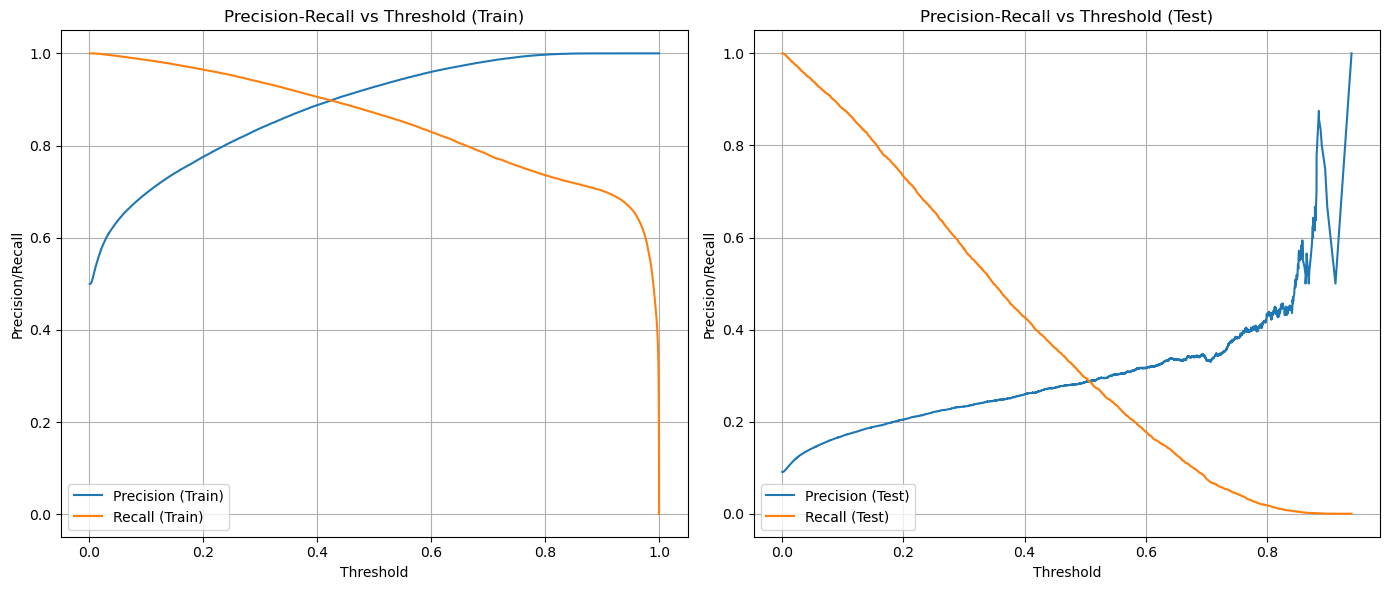

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming transformed_data is your dataset
X = transformed_data.drop('HeartDisease', axis=1)
y = transformed_data['HeartDisease']

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Fit the model on the resampled training data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Predict probabilities on both training and testing sets
y_prob_train = xgb_model.predict_proba(X_train_resampled)[:, 1]  # Probabilities for the positive class (Train)
y_prob_test = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (Test)

# Function to evaluate model with a custom threshold
def evaluate_threshold(y_true, y_prob, threshold, dataset_name=''):
    y_pred_custom = (y_prob >= threshold).astype(int)
    print(f"\nClassification Report with Threshold {threshold} ({dataset_name} Set):")
    print(classification_report(y_true, y_pred_custom))
    print(f"Confusion Matrix with Threshold {threshold} ({dataset_name} Set):")
    print(confusion_matrix(y_true, y_pred_custom))

# Step 5: Example usage with a custom threshold for both train and test sets
threshold = 0.5  # You can change this value to test different thresholds

# Evaluate on the Training set
evaluate_threshold(y_train_resampled, y_prob_train, threshold, dataset_name='Train')

# Evaluate on the Testing set
evaluate_threshold(y_test, y_prob_test, threshold, dataset_name='Test')

# Step 6: Calculate Precision-Recall curve for both training and testing sets
precision_train_curve, recall_train_curve, thresholds_train = precision_recall_curve(y_train_resampled, y_prob_train)
precision_test_curve, recall_test_curve, thresholds_test = precision_recall_curve(y_test, y_prob_test)

# Step 7: Plot Precision-Recall Curve vs Threshold for both sets
plt.figure(figsize=(14, 6))

# Training Precision-Recall vs Threshold plot
plt.subplot(1, 2, 1)
plt.plot(thresholds_train, precision_train_curve[:-1], label='Precision (Train)')
plt.plot(thresholds_train, recall_train_curve[:-1], label='Recall (Train)')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision-Recall vs Threshold (Train)')
plt.legend()
plt.grid(True)

# Testing Precision-Recall vs Threshold plot
plt.subplot(1, 2, 2)
plt.plot(thresholds_test, precision_test_curve[:-1], label='Precision (Test)')
plt.plot(thresholds_test, recall_test_curve[:-1], label='Recall (Test)')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision-Recall vs Threshold (Test)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 8: Optional: Evaluate the model at different thresholds
# You can call evaluate_threshold() for different values of thresholds


C:\Users\CREYSAC\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



Fold 1
Class distribution in resampled training set: [21764 21764]
Classification Report with custom threshold 0.5 (Fold 1):
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      5442
         1.0       0.73      0.79      0.76      5442

    accuracy                           0.75     10884
   macro avg       0.75      0.75      0.75     10884
weighted avg       0.75      0.75      0.75     10884

Confusion Matrix (Fold 1):
[[3854 1588]
 [1159 4283]]

Fold 2
Class distribution in resampled training set: [21765 21765]
Classification Report with custom threshold 0.5 (Fold 2):
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      5441
         1.0       0.73      0.79      0.75      5441

    accuracy                           0.74     10882
   macro avg       0.75      0.74      0.74     10882
weighted avg       0.75      0.74      0.74     10882

Confusion Matrix (Fold 2):
[[3818 1623]


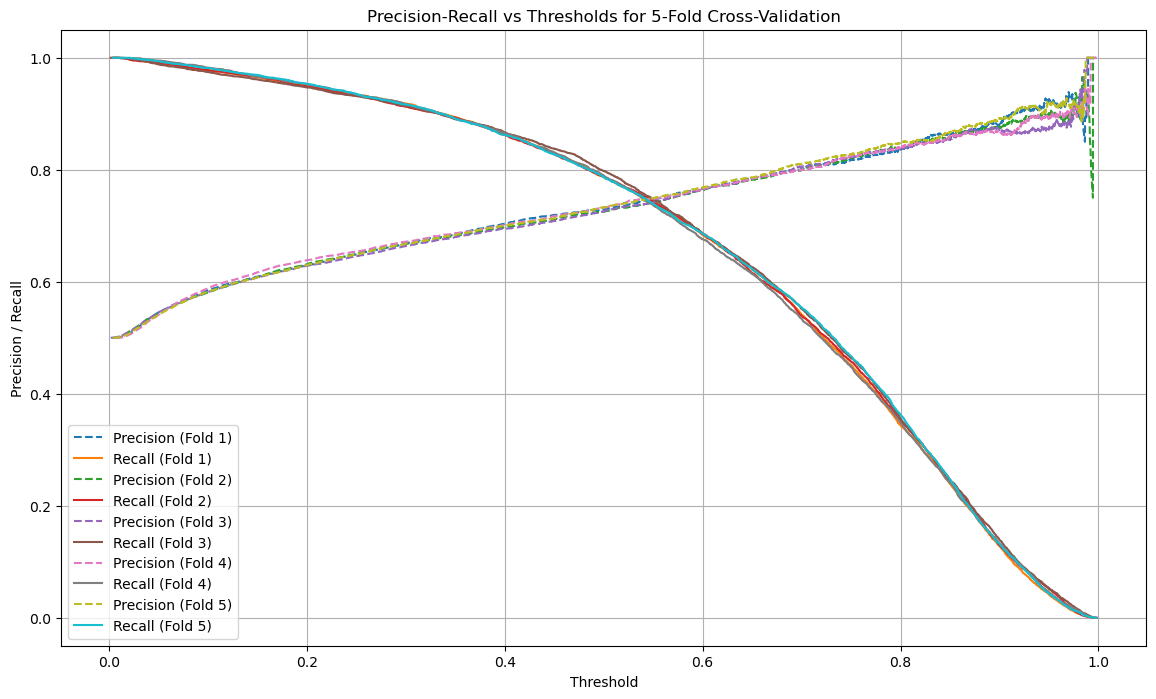

In [99]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, accuracy_score
import matplotlib.pyplot as plt

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Assuming X is your features and y is your target
# X = pd.DataFrame(...)  # your features
# y = pd.Series(...)     # your target

# Separate data by class
class_data = {label: X[y == label] for label in np.unique(y)}
class_labels = list(class_data.keys())
min_class_size = min(len(class_data[label]) for label in class_labels)  # Minimum class size

# Create folds
n_splits = 5
folds = []
for label in class_labels:
    class_samples = class_data[label].sample(n=min_class_size, random_state=42)
    folds.append(np.array_split(class_samples, n_splits))

# Combine folds
final_folds = []
for i in range(n_splits):
    fold = pd.concat([folds[j][i] for j in range(len(folds))])
    final_folds.append(fold)

# Initialize plot
plt.figure(figsize=(14, 8))

# Custom threshold for classification
custom_threshold = 0.5  # You can adjust this

for fold_index in range(n_splits):
    print(f"\nFold {fold_index + 1}")
    
    # Prepare the training and validation sets
    val_data = final_folds[fold_index]
    train_data = pd.concat([final_folds[i] for i in range(n_splits) if i != fold_index])
    
    X_train_fold, y_train_fold = train_data, y[train_data.index]
    X_val_fold, y_val_fold = val_data, y[val_data.index]
    
    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Print the number of instances per class after SMOTE
    print(f"Class distribution in resampled training set: {np.bincount(y_train_resampled)}")
    
    # Fit the model on the resampled data
    xgb_model.fit(X_train_resampled, y_train_resampled)
    
    # Get probabilities for validation set (probabilities for the positive class)
    y_val_scores = xgb_model.predict_proba(X_val_fold)[:, 1]

    # Apply the custom threshold to get predictions
    y_val_pred_custom = (y_val_scores >= custom_threshold).astype(int)

    # Step 7: Calculate Precision-Recall curve and thresholds for validation set
    precision_curve, recall_curve, thresholds_curve = precision_recall_curve(y_val_fold, y_val_scores)
    
    # Print Classification Report and Confusion Matrix for custom threshold
    print(f"Classification Report with custom threshold {custom_threshold} (Fold {fold_index + 1}):")
    print(classification_report(y_val_fold, y_val_pred_custom))
    print(f"Confusion Matrix (Fold {fold_index + 1}):")
    print(confusion_matrix(y_val_fold, y_val_pred_custom))

    # Plot Precision-Recall vs Thresholds for this fold
    plt.plot(thresholds_curve, precision_curve[:-1], label=f'Precision (Fold {fold_index + 1})', linestyle='--')
    plt.plot(thresholds_curve, recall_curve[:-1], label=f'Recall (Fold {fold_index + 1})')
    
# Finalize plot(Custom Threshold = {custom_threshold})')
plt.xlabel('Threshold')
plt.title(f'Precision-Recall vs Thresholds for 5-Fold Cross-Validation')
plt.xlabel('Threshold')
plt.ylabel('Precision / Recall')
plt.legend(loc='best')
plt.grid()
plt.show()


C:\Users\CREYSAC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CREYSAC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CREYSAC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CREYSAC\anaconda3\Lib\site-packages\sklearn\metri

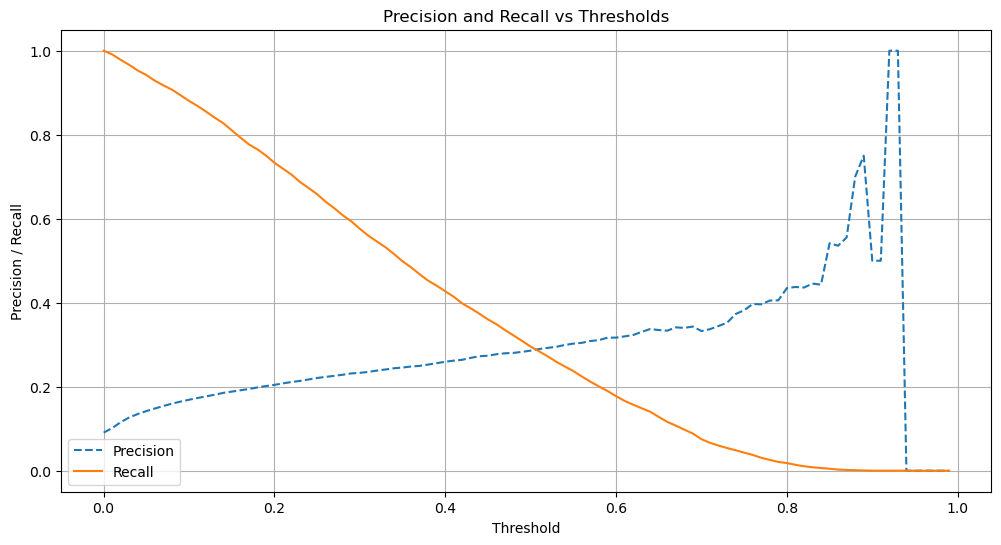

In [87]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming X is your features and y is your target
# X = pd.DataFrame(...)  # your features
# y = pd.Series(...)     # your target

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Fit the model on the resampled training data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Predict probabilities on the testing set
y_prob_test = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 5: Define a range of thresholds
thresholds = np.arange(0.0, 1.0, 0.01)

# Initialize lists to hold precision and recall values
precision_values = []
recall_values = []

# Step 6: Calculate precision and recall for each threshold
for threshold in thresholds:
    y_pred_custom = (y_prob_test >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_custom)
    recall = recall_score(y_test, y_pred_custom)
    
    precision_values.append(precision)
    recall_values.append(recall)

# Step 7: Plot Precision-Recall vs Thresholds
plt.figure(figsize=(12, 6))
plt.plot(thresholds, precision_values, label='Precision', linestyle='--')
plt.plot(thresholds, recall_values, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision / Recall')
plt.title('Precision and Recall vs Thresholds')
plt.legend(loc='best')
plt.grid()
plt.show()


In [75]:
transformed_data.head()

,BMI,AgeCategory,SleepTime,PhysicalHealth,MentalHealth,GenHealth,Diabetic,Sex,Smoking,Stroke,PhysicalActivity,DiffWalking,HeartDisease
0,-1.859623,-0.052279,3.180284,0.137281,2.534518,0.412879,-1.420080,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.269635,-0.427602,-0.507428,1.532351,-0.417194,0.412879,-0.057766,0.0,0.0,1.0,1.0,0.0,0.0
2,-0.285269,2.074551,3.180284,0.695309,2.534518,-1.536150,0.623391,1.0,1.0,0.0,1.0,0.0,0.0
3,-0.659139,-0.427602,-0.507428,1.253337,-0.417194,-0.561636,-0.738923,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.738014,3.075412,-0.507428,-0.699762,-0.417194,0.412879,0.623391,0.0,0.0,0.0,1.0,1.0,0.0


Train Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.74      0.78    218947
         1.0       0.76      0.84      0.80    218947

    accuracy                           0.79    437894
   macro avg       0.79      0.79      0.79    437894
weighted avg       0.79      0.79      0.79    437894

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83     54737
         1.0       0.21      0.74      0.33      5441

    accuracy                           0.73     60178
   macro avg       0.59      0.73      0.58     60178
weighted avg       0.90      0.73      0.78     60178

Confusion Matrix (Test Set):
[[39824 14913]
 [ 1419  4022]]
Train Accuracy: 0.7886977213663581
Test Accuracy: 0.728605138090332


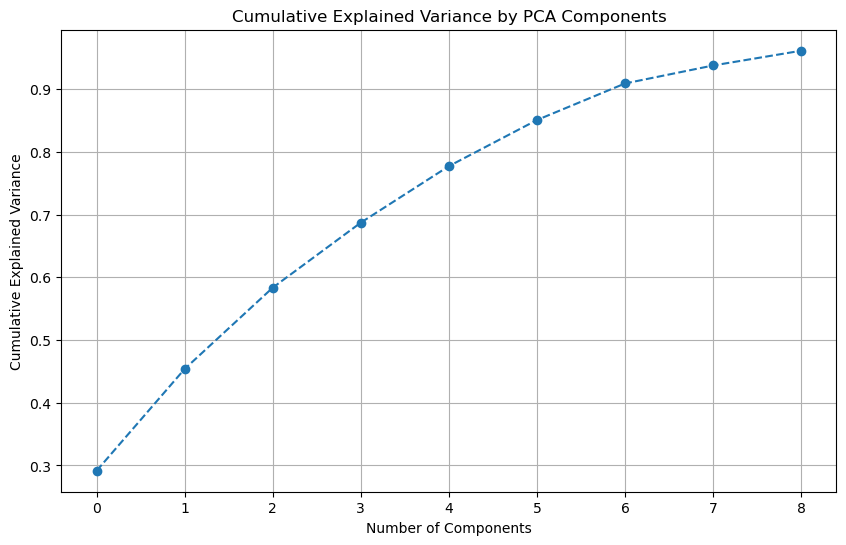

In [77]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Separate Features and Target
X = transformed_data.drop(columns='HeartDisease')
y = transformed_data['HeartDisease']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 4: Apply PCA directly (since non-binary columns are already scaled)
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)  # Don't resample the test set, just use PCA

# Step 5: Train your model (XGBoost in this case)
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_pca, y_train_resampled)

# Step 6: Make predictions
y_train_pred = xgb_model.predict(X_train_pca)
y_test_pred = xgb_model.predict(X_test_pca)

# Step 7: Evaluate the model on training and test sets
print("Train Classification Report:")
print(classification_report(y_train_resampled, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

# Accuracy Score
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Step 8: Optional - Plot explained variance ratio by each principal component
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming 'transformed_data' is your DataFrame, with features and target
# Separate the features and target
X = transformed_data.drop(columns=['HeartDisease'])
y = transformed_data['HeartDisease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Build a simple neural network model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dropout(0.2))

# Hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate on the train set
y_train_pred = (model.predict(X_train_resampled) >= 0.5).astype(int)

# Evaluate on the test set
y_test_pred = (model.predict(X_test) >= 0.5).astype(int)

# Print classification reports and confusion matrices
print("Training Set Results:")
print(classification_report(y_train_resampled, y_train_pred))
print(confusion_matrix(y_train_resampled, y_train_pred))

print("\nTest Set Results:")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))


C:\Users\CREYSAC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
10949/10949 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7521 - loss: 0.4963 - val_accuracy: 0.6688 - val_loss: 0.6799
Epoch 2/20
10949/10949 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7616 - loss: 0.4809 - val_accuracy: 0.6525 - val_loss: 0.6915
Epoch 3/20
10949/10949 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7648 - loss: 0.4769 - val_accuracy: 0.6931 - val_loss: 0.6455
Epoch 4/20
10949/10949 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7644 - loss: 0.4768 - val_accuracy: 0.6487 - val_loss: 0.6909
Epoch 5/20
10949/10949 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7660 - loss: 0.4750 - val_accuracy: 0.6810 - val_loss: 0.6645
Epoch 6/20
10949/10949 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7664 - loss: 0.4732 - val_accuracy: 0.6612 - val_loss: 0.6734
Epoch 7/20
10949/10949 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7674 - loss: 0.4726 - val_accuracy: 0.6777 - val_loss: 0.6855
Epoch 8/20
10949/10949 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 

In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Assuming transformed_data is your dataset
X = transformed_data.drop('HeartDisease', axis=1)
y = transformed_data['HeartDisease']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, random_state=42)

# Train the model on the resampled training data
mlp.fit(X_train_resampled, y_train_resampled)

# Make predictions on the training set
y_train_pred = mlp.predict(X_train_resampled)

# Make predictions on the test set
y_test_pred = mlp.predict(X_test)

# Evaluation on the training set
print("Training Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_train_resampled, y_train_pred):.4f}")
print("Classification Report:")
print(classification_report(y_train_resampled, y_train_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train_resampled, y_train_pred))

# Evaluation on the test set
print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Training Set Evaluation:
Accuracy: 0.8352
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84    218947
         1.0       0.84      0.83      0.84    218947

    accuracy                           0.84    437894
   macro avg       0.84      0.84      0.84    437894
weighted avg       0.84      0.84      0.84    437894

Confusion Matrix:
[[182972  35975]
 [ 36178 182769]]

Test Set Evaluation:
Accuracy: 0.7938
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88     54737
         1.0       0.23      0.54      0.32      5441

    accuracy                           0.79     60178
   macro avg       0.59      0.68      0.60     60178
weighted avg       0.88      0.79      0.83     60178

Confusion Matrix:
[[44850  9887]
 [ 2524  2917]]
